<h1>Préparer les données<h1>

In [3]:
#Importer les librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz 
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree

In [4]:
#Importer les données
mbamFull = pd.read_csv("C:\\Users\\ouafi\\Desktop\\Cours HEC Montreal\\HEC Data Challenge\\mbam_complet.csv", encoding='ISO-8859-1')
mbamCut = pd.read_csv("C:\\Users\\ouafi\\Desktop\\Cours HEC Montreal\\HEC Data Challenge\\mbam_censure.csv", encoding='ISO-8859-1')
mbamConvert = pd.read_csv("C:\\Users\\ouafi\\Desktop\\Cours HEC Montreal\\HEC Data Challenge\\mbam_comportement_convertis.csv", encoding='ISO-8859-1')

<h1>Observer les données<h1>

In [44]:
#Oberver les données de Full
mbamFull.head(5)

,num_dossier_mbam_coded,campaign_id,campaign_name,campagnes,statut,inscription,langue,lettre,date_envoi,hardbounce,...,nbr_hardbounce,nbr_softbounce,nbr_delivered,nbr_open,nbr_clicked,nbr_converted2,nbr_complaint,nbr_unsubscribed,nbr_not_open,nbr_open_but_didnt_click
0,0000fce4f46f0e6d5bf322cfe94606b5,570889,MEM_20200109_CampagneFêtesVISITEURS_Anglais_A,CampagneFêtes,VISITEURS,NaN,ENG,A,2020-01-09T11:00:12,0,...,0,0,1,1,0,0,0,0,0,1
1,0000fce4f46f0e6d5bf322cfe94606b5,571993,MEM_20200116_StValentinExpos_VISITEURS_ENG_C,StValentinExpos,VISITEURS,NaN,ENG,C,2020-01-16T13:01:33,0,...,0,0,1,0,0,0,0,0,1,0
2,0000fce4f46f0e6d5bf322cfe94606b5,573001,MEM_20200123_StValentinForfaits_VISITEURS_ENG_B,StValentinForfaits,VISITEURS,NaN,ENG,B,2020-01-23T13:31:49,0,...,0,0,1,0,0,0,0,0,1,0
3,0000fce4f46f0e6d5bf322cfe94606b5,574545,MEM_20200130_StValentinExpos_VISITEURS_ENG_C,StValentinExpos,VISITEURS,NaN,ENG,C,2020-01-30T13:00:56,0,...,0,0,1,1,0,0,0,0,0,1
4,0000fce4f46f0e6d5bf322cfe94606b5,576342,MEM_20200206_StValentinForfaits_VISITEURS_ENG_C,StValentinForfaits,VISITEURS,NaN,ENG,C,2020-02-06T13:01:54,0,...,0,0,1,0,0,0,0,0,1,0


In [8]:
#Oberver les données de Censuré
mbamCut.head(5)

,num_dossier_mbam_coded,campaign_id,campaign_name,campagnes,statut,inscription,langue,lettre,date_envoi,hardbounce,...,nbr_hardbounce,nbr_softbounce,nbr_delivered,nbr_open,nbr_clicked,nbr_converted2,nbr_complaint,nbr_unsubscribed,nbr_not_open,nbr_open_but_didnt_click
0,0000fce4f46f0e6d5bf322cfe94606b5,570889,MEM_20200109_CampagneFêtesVISITEURS_Anglais_A,CampagneFêtes,VISITEURS,NaN,ENG,A,2020-01-09T11:00:12,0,...,0,0,1,1,0,0,0,0,0,1
1,0000fce4f46f0e6d5bf322cfe94606b5,571993,MEM_20200116_StValentinExpos_VISITEURS_ENG_C,StValentinExpos,VISITEURS,NaN,ENG,C,2020-01-16T13:01:33,0,...,0,0,1,0,0,0,0,0,1,0
2,0000fce4f46f0e6d5bf322cfe94606b5,573001,MEM_20200123_StValentinForfaits_VISITEURS_ENG_B,StValentinForfaits,VISITEURS,NaN,ENG,B,2020-01-23T13:31:49,0,...,0,0,1,0,0,0,0,0,1,0
3,0000fce4f46f0e6d5bf322cfe94606b5,574545,MEM_20200130_StValentinExpos_VISITEURS_ENG_C,StValentinExpos,VISITEURS,NaN,ENG,C,2020-01-30T13:00:56,0,...,0,0,1,1,0,0,0,0,0,1
4,0000fce4f46f0e6d5bf322cfe94606b5,576342,MEM_20200206_StValentinForfaits_VISITEURS_ENG_C,StValentinForfaits,VISITEURS,NaN,ENG,C,2020-02-06T13:01:54,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
#Oberver les données de Converti
mbamConvert.head(5)

,num_dossier_mbam_coded,campaign_id,campaign_name,campagnes,statut,inscription,langue,lettre,date_envoi,hardbounce,...,nbr_hardbounce,nbr_softbounce,nbr_delivered,nbr_open,nbr_clicked,nbr_converted2,nbr_complaint,nbr_unsubscribed,nbr_not_open,nbr_open_but_didnt_click
0,0013205fb4a480640c3d556e2aa2347e,570871,MEM_20200109_CampagneFêtesACTIFS_Français_B,CampagneFêtes,ACTIFS,NaN,FR,B,2020-01-09T13:03:24,0,...,0,0,1,1,0,0,0,0,0,1
1,0013205fb4a480640c3d556e2aa2347e,571966,MEM_20200116_StValentinExpos_ACTIFS_FR_B,StValentinExpos,ACTIFS,NaN,FR,B,2020-01-16T13:03:55,0,...,0,0,1,1,0,0,0,0,0,1
2,0013205fb4a480640c3d556e2aa2347e,576313,MEM_20200206_StValentinForfaits_ACTIFS_FR_C,StValentinForfaits,ACTIFS,NaN,FR,C,2020-02-06T13:04:23,0,...,0,0,1,1,0,1,0,0,0,1
3,004d3bcaad3605acb95fb0c3b36ca6db,570870,MEM_20200109_CampagneFêtesACTIFS_Français_A,CampagneFêtes,ACTIFS,NaN,FR,A,2020-01-09T11:00:17,0,...,0,0,1,1,0,0,0,0,0,1
4,004d3bcaad3605acb95fb0c3b36ca6db,571966,MEM_20200116_StValentinExpos_ACTIFS_FR_B,StValentinExpos,ACTIFS,NaN,FR,B,2020-01-16T13:03:41,0,...,0,0,1,1,0,0,0,0,0,1


In [9]:
#Noms de colonnes et type d'informations dans Full
mbamFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2836381 entries, 0 to 2836380
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   num_dossier_mbam_coded    object 
 1   campaign_id               int64  
 2   campaign_name             object 
 3   campagnes                 object 
 4   statut                    object 
 5   inscription               float64
 6   langue                    object 
 7   lettre                    object 
 8   date_envoi                object 
 9   hardbounce                int64  
 10  softbounce                int64  
 11  delivered                 int64  
 12  open                      int64  
 13  clicked                   int64  
 14  converted                 int64  
 15  complaint                 int64  
 16  unsubscribed              int64  
 17  not_open                  int64  
 18  open_but_didnt_click      int64  
 19  first_transaction         object 
 20  date_envoi2             

<h1>Création du Funnel :<h1>

In [63]:
#Préparations funnel step 1
fOpen=mbamFull['open'].value_counts()
print(fOpen)

0    1909258
1     927123
Name: open, dtype: int64


In [64]:
#funnel step 1
openCount= mbamFull['open'].sum()
totalMail=openCount + 1909258
percentCount = openCount / totalMail * 100
print('Nombre de mails ouverts : '+str(openCount))
print('Le pourcentage de mails ouverts est : ' + str(percentCount))

Nombre de mails ouverts : 927123
Le pourcentage de mails ouverts est : 32.68682874409327


In [66]:
#Préparations funnel step 2
fClick=mbamFull['clicked'].value_counts()
print(fClick)

0    2776069
1      60312
Name: clicked, dtype: int64


In [67]:
#funnel step 2
clickCount=mbamFull['clicked'].sum()
percentClick=clickCount/openCount *100
print('Nombre de mails cliqués : '+str(clickCount))
print('Le pourcentage de mails cliqués est : ' + str(percentClick))

Nombre de mails cliqués : 60312
Le pourcentage de mails cliqués est : 6.505285706427302


In [5]:
#Préparation funnel step 3
fConvert = mbamFull['converted2'].value_counts()
print(fConvert)

0    2830953
1       5428
Name: converted2, dtype: int64


In [72]:
#funnel step 3
convertCount=mbamFull['converted2'].sum()
percentConvert=convertCount/clickCount *100
print('Nombre de personnes converties : '+str(convertCount))
print('Le pourcentage de personnes converties est : ' + str(percentConvert))

Nombre de personnes converties : 5428
Le pourcentage de personnes converties est : 8.999867356413317


<h1>Funnel en fonction des langues<h1>

In [7]:
#Préparations funnel langue step 1
mbamFull.groupby('langue')['open'].value_counts() 

langue  open
ENG     0        541616
        1        201174
FR      0       1359356
        1        720746
Name: open, dtype: int64

In [11]:
#funnel langue step 1
engOpenCount=(201174/(541616+201174))*100
frOpenCount=(720746/(720746+1359356))*100
print("Le pourcentage d'ouverture des mails anglais est : " + str(engOpenCount))
print("Le pourcentage d'ouverture des mails français est : " + str(frOpenCount))

Le pourcentage d'ouverture des mails anglais est : 27.083563322069494
Le pourcentage d'ouverture des mails français est : 34.64955083933384


In [12]:
#Préparations funnel langue step 2
mbamFull.groupby('langue')['clicked'].value_counts() 

langue  clicked
ENG     0           729962
        1            12828
FR      0          2032963
        1            47139
Name: clicked, dtype: int64

In [13]:
#funnel langue step 2
engClickCount=(12828/201174)*100
frClickCount=(47139/720746)*100
print("Le pourcentage de cliques sur des mails anglais ouverts est : " + str(engClickCount))
print("Le pourcentage de cliques sur des mails français ouverts est : " + str(frClickCount))

Le pourcentage de cliques sur des mails anglais ouverts est : 6.376569536818873
Le pourcentage de cliques sur des mails français ouverts est : 6.540306848737281


In [15]:
#Préparations funnel langue step 3
mbamFull.groupby('langue')['converted2'].value_counts()

langue  converted2
ENG     0              741732
        1                1058
FR      0             2075740
        1                4362
Name: converted2, dtype: int64

In [16]:
#funnel langue step 3
engConvertCount=(1058/12828)*100
frConvertCount=(4362/47139)*100
print("Le pourcentage de personnes converties sur des mails anglais cliqués est : " + str(engConvertCount))
print("Le pourcentage de personnes converties sur des mails français cliqués est : " + str(frConvertCount))

Le pourcentage de personnes converties sur des mails anglais cliqués est : 8.247583411287808
Le pourcentage de personnes converties sur des mails français cliqués est : 9.2534843759944


<h2>Funnel en fonction des langues et des types de campagnes<h2>

In [24]:
#Préparations funnel langue/type step 1
mbamFull.groupby(['langue', 'type_campaign'])['open'].value_counts() 

langue  type_campaign  open
ENG     Cadeau         0        23268
                       1         8577
        Prolongation   0       142798
                       1        76777
        Rabais         0       375550
                       1       115820
FR      Cadeau         0        59460
                       1        33383
        Prolongation   0       390883
                       1       294314
        Rabais         0       909013
                       1       393049
Name: open, dtype: int64

In [28]:
#funnel langue/type campagne step 1
engGiftOpenCount=(8577/(8577+23268))*100
engProloOpenCount=(76777/(76777+142798))*100
engSaleOpenCount=(115820/(115820+375550))*100
frGiftOpenCount=(33383/(33383+59460))*100
frProloOpenCount=(294314/(294314+390883))*100
frSaleOpenCount=(393049/(393049+909013))*100
print("Les pourcentages d'ouverture des mails anglais sont : " + str(round(engGiftOpenCount, 2))+ " pour les cadeaux, "+ str(round(engProloOpenCount, 2))+ " pour les prolongations et " + str(round(engSaleOpenCount, 2)) + " pour les rabais.")
print("Les pourcentages d'ouverture des mails français sont : " + str(round(frGiftOpenCount, 2))+ " pour les cadeaux, "+ str(round(frProloOpenCount, 2))+ " pour les prolongations et " + str(round(frSaleOpenCount, 2)) + " pour les rabais.")

Les pourcentages d'ouverture des mails anglais sont : 26.93 pour les cadeaux, 34.97 pour les prolongations et 23.57 pour les rabais.
Les pourcentages d'ouverture des mails français sont : 35.96 pour les cadeaux, 42.95 pour les prolongations et 30.19 pour les rabais.


In [29]:
#Préparations funnel langue/type step 2
mbamFull.groupby(['langue', 'type_campaign'])['clicked'].value_counts() 

langue  type_campaign  clicked
ENG     Cadeau         0            31509
                       1              336
        Prolongation   0           212257
                       1             7318
        Rabais         0           486196
                       1             5174
FR      Cadeau         0            91550
                       1             1293
        Prolongation   0           657002
                       1            28195
        Rabais         0          1284411
                       1            17651
Name: clicked, dtype: int64

In [33]:
#funnel langue/type campagne step 2
engGiftClickCount=(336/8577)*100
engProloClickCount=(7318/76777)*100
engSaleClickCount=(5174/115820)*100
frGiftClickCount=(1293/33383)*100
frProloClickCount=(28195/294314)*100
frSaleClickCount=(17651/393049)*100
print("Les pourcentages d'ouverture des mails anglais sont : " + str(round(engGiftClickCount, 2))+ " pour les cadeaux, "+ str(round(engProloClickCount, 2))+ " pour les prolongations et " + str(round(engSaleClickCount, 2)) + " pour les rabais.")
print("Les pourcentages d'ouverture des mails français sont : " + str(round(frGiftClickCount, 2))+ " pour les cadeaux, "+ str(round(frProloClickCount, 2))+ " pour les prolongations et " + str(round(frSaleClickCount, 2)) + " pour les rabais.")

Les pourcentages d'ouverture des mails anglais sont : 3.92 pour les cadeaux, 9.53 pour les prolongations et 4.47 pour les rabais.
Les pourcentages d'ouverture des mails français sont : 3.87 pour les cadeaux, 9.58 pour les prolongations et 4.49 pour les rabais.


In [34]:
#Préparations funnel langue/type step 3
mbamFull.groupby(['langue', 'type_campaign'])['converted2'].value_counts() 

langue  type_campaign  converted2
ENG     Cadeau         0               31834
                       1                  11
        Prolongation   0              219173
                       1                 402
        Rabais         0              490725
                       1                 645
FR      Cadeau         0               92777
                       1                  66
        Prolongation   0              683579
                       1                1618
        Rabais         0             1299384
                       1                2678
Name: converted2, dtype: int64

In [35]:
#funnel langue/type campagne step 3
engGiftConvertCount=(11/336)*100
engProloConvertCount=(402/7318)*100
engSaleConvertCount=(645/5174)*100
frGiftConvertCount=(66/1293)*100
frProloConvertCount=(1618/28195)*100
frSaleConvertCount=(2678/17651)*100
print("Les pourcentages d'ouverture des mails anglais sont : " + str(round(engGiftConvertCount, 2))+ " pour les cadeaux, "+ str(round(engProloConvertCount, 2))+ " pour les prolongations et " + str(round(engSaleConvertCount, 2)) + " pour les rabais.")
print("Les pourcentages d'ouverture des mails français sont : " + str(round(frGiftConvertCount, 2))+ " pour les cadeaux, "+ str(round(frProloConvertCount, 2))+ " pour les prolongations et " + str(round(frSaleConvertCount, 2)) + " pour les rabais.")

Les pourcentages d'ouverture des mails anglais sont : 3.27 pour les cadeaux, 5.49 pour les prolongations et 12.47 pour les rabais.
Les pourcentages d'ouverture des mails français sont : 5.1 pour les cadeaux, 5.74 pour les prolongations et 15.17 pour les rabais.


<h1>Observations données en fonctions du point de vente<h1>

In [42]:
mbamFull.groupby(['point_de_vente'])['converted2'].value_counts()
#Pas d'informations interessantes

point_de_vente       converted2
Accueil              0              3953
                     1               153
Appels entrants      0             18749
                     1              1057
Appels sortants      0             13492
                     1               812
BiOz                 0             54639
                     1              3385
Billetterie          0                99
                     1                 2
Courrier             0               297
                     1                17
Divers/à déterminer  0                17
                     1                 1
TLMK-FMBAM           0                16
                     1                 1
Name: converted2, dtype: int64

In [47]:
mbamConverted.groupby(['point_de_vente', 'langue'])['converted2'].value_counts()
#Pas d'informations interessantes

point_de_vente       langue  converted2
Accueil              ENG     1               35
                     FR      1              118
Appels entrants      ENG     1              159
                     FR      1              897
Appels sortants      ENG     1              165
                     FR      1              647
BiOz                 ENG     1              695
                     FR      1             2683
Billetterie          FR      1                2
Courrier             ENG     1                3
                     FR      1               14
Divers/à déterminer  FR      1                1
TLMK-FMBAM           ENG     1                1
Name: converted2, dtype: int64

<h1>Arbre de décisions<h1>

In [10]:
#Transformer les variables pour les rendre utilisables
enc = LabelEncoder()
mbamFull['type_campaign'] = enc.fit_transform(mbamFull['type_campaign'])

enc = LabelEncoder()
mbamFull['statut'] = enc.fit_transform(mbamFull['statut'])

#Préciser les dimensions et variable cibles
colsCara = ['nbr_open', 'nbr_clicked', 'type_campaign', 'statut']
X = mbamFull[colsCara] # Features
y = mbamFull.converted2 # Target variable

In [11]:
# Séparer dataset en deux
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Créer un Decision Tree
clf = DecisionTreeClassifier()

# Entrainer le Decision Tree
clf = clf.fit(X_train,y_train)

#Prédire la résponse pour le test
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9980515092576815


[Text(145.98987635239567, 209.6742857142857, 'X[1] <= 0.5\ngini = 0.004\nsamples = 1985466\nvalue = [1981696, 3770]'),
 Text(55.36877897990726, 194.14285714285714, 'X[3] <= 0.5\ngini = 0.002\nsamples = 1908921\nvalue = [1907128, 1793]'),
 Text(24.320865533230293, 178.61142857142858, 'X[0] <= 1.5\ngini = 0.007\nsamples = 426530\nvalue = [425075, 1455]'),
 Text(8.279443585780525, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.008\nsamples = 331993\nvalue = [330604, 1389]'),
 Text(4.1397217928902625, 147.54857142857142, 'X[2] <= 0.5\ngini = 0.006\nsamples = 179768\nvalue = [179246, 522]'),
 Text(2.0698608964451313, 132.01714285714286, 'gini = 0.0\nsamples = 15526\nvalue = [15525, 1]'),
 Text(6.209582689335393, 132.01714285714286, 'X[2] <= 1.5\ngini = 0.006\nsamples = 164242\nvalue = [163721, 521]'),
 Text(4.1397217928902625, 116.48571428571428, 'gini = 0.007\nsamples = 94933\nvalue = [94583, 350]'),
 Text(8.279443585780525, 116.48571428571428, 'gini = 0.005\nsamples = 69309\nvalue = [69138, 1

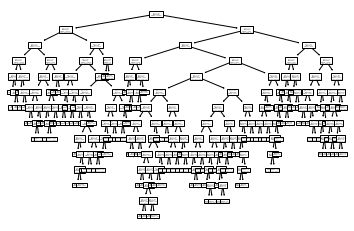

In [13]:
tree.plot_tree(clf)

In [ ]:
#Obtenir l'arbre de décision selon nos envies et l'extraire
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus

# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])

# dot_data = StringIO()
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# print(graph)
# graph.render()

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = colsCara, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('data.png')
Image(graph.create_png())